In [210]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from scipy import stats

In [211]:
#reading the data
data= pd.read_csv('titanic_dataset.csv')

In [4]:
#performing EDA
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data.shape

(891, 11)

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [212]:
data['PassengerId'].nunique()

891

In [54]:
data['Name'].nunique()

891

In [38]:
#checking for missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [213]:
data.drop(['PassengerId'],axis=1,inplace=True)

In [63]:
for i in data.columns:
     print(i,data[i].nunique())
     

Survived 2
Pclass 3
Name 891
Sex 2
Age 88
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 147
Embarked 3


In [214]:
data.drop(['Name'],axis=1,inplace=True)

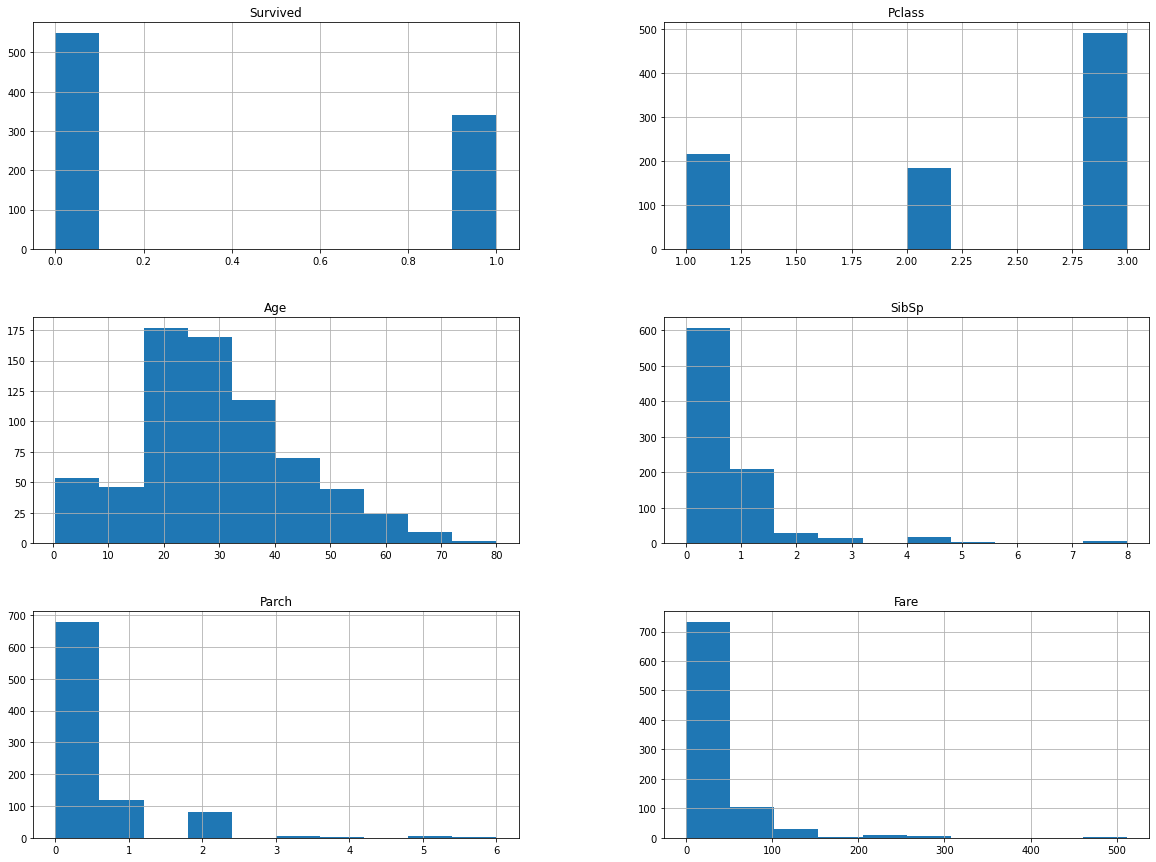

In [16]:
#missing values of normal distributed data can be filled by mean or median
#skewed data can be filled by median
#to find if data normal or skewed we plot it

freqgraph=data.select_dtypes(include=['float','int','object'])
freqgraph.hist(figsize=(20,15))
plt.show()

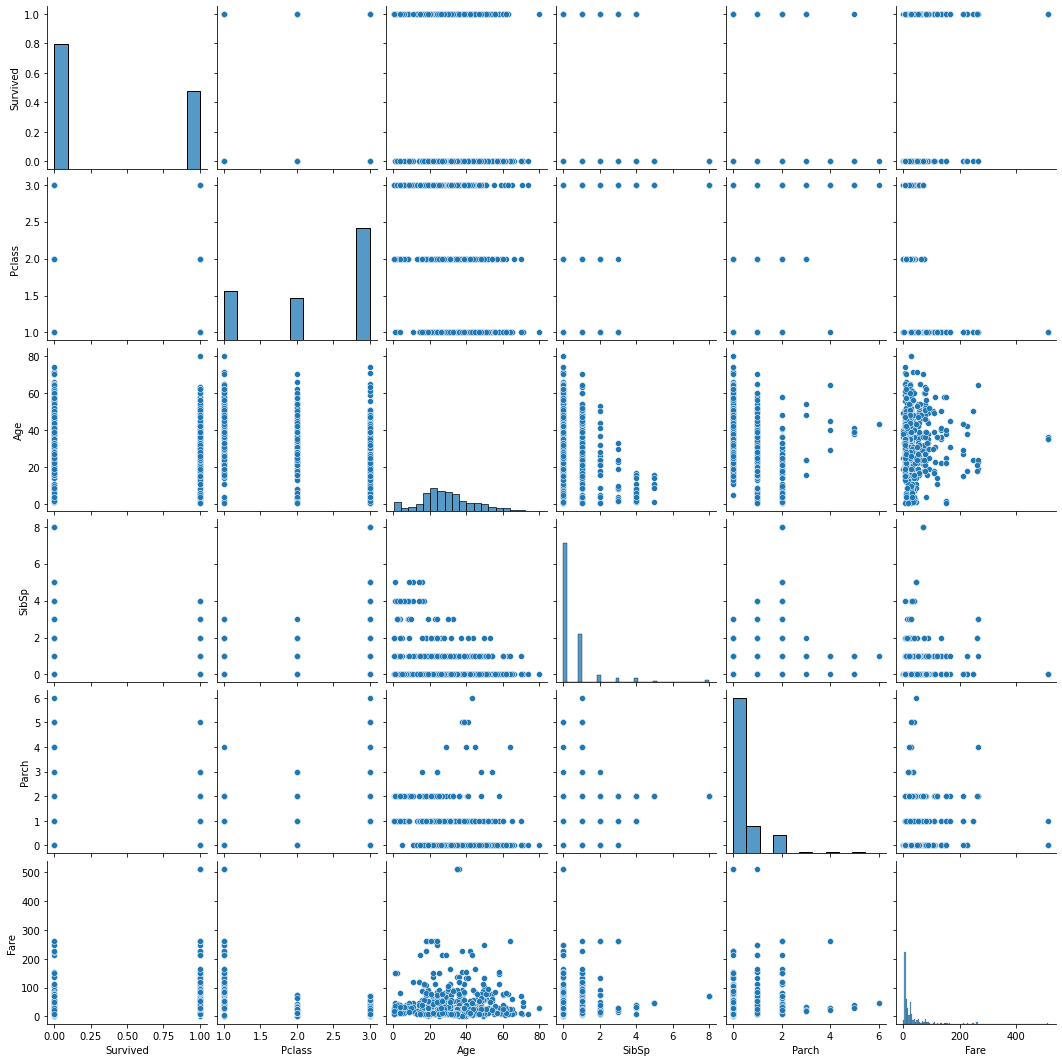

In [19]:
#pairplot of data
sns.pairplot(data)

<Axes: >

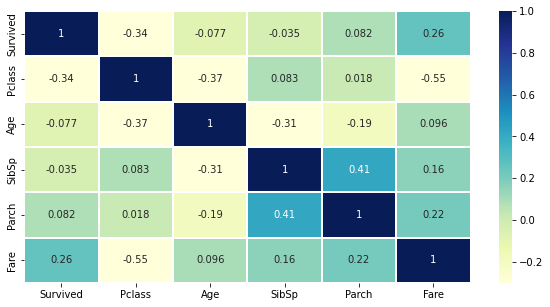

In [20]:
#ploting correlation matrix
corrmatrix =data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,annot=True,vmin=-0.3,vmax=1,linewidth=0.3,cmap='YlGnBu')

In [215]:
#filling missing values  by median
data['Age']=data['Age'].fillna(data['Age'].median())

In [66]:
data['Cabin'].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [216]:
# filling with most common class
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [217]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [44]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [68]:
cols=data[[ 'Sex','Ticket', 'Cabin', 'Embarked']]
cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Ticket    891 non-null    object
 2   Cabin     891 non-null    object
 3   Embarked  891 non-null    object
dtypes: object(4)
memory usage: 28.0+ KB


In [218]:
#label encoding test set
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in [ 'Sex','Ticket', 'Cabin', 'Embarked']:
          data[col]=le.fit_transform(data[col])


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    int64  
 9   Embarked  891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


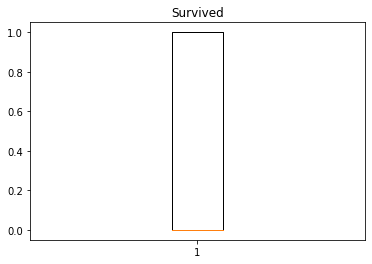

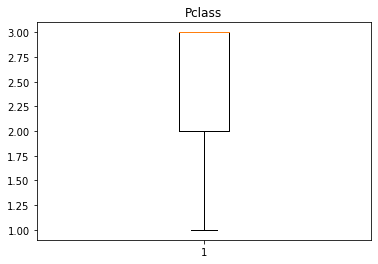

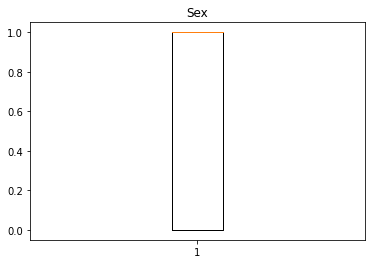

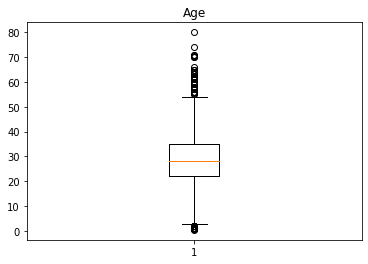

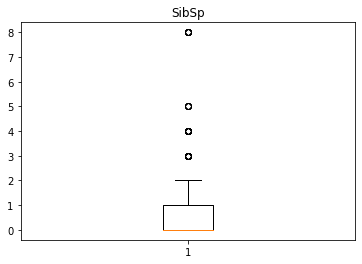

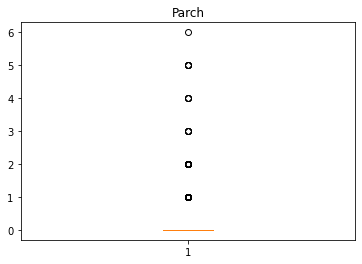

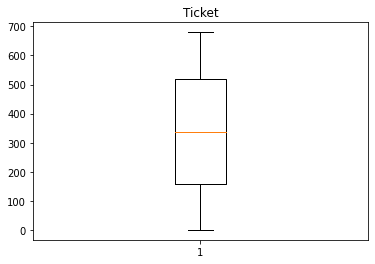

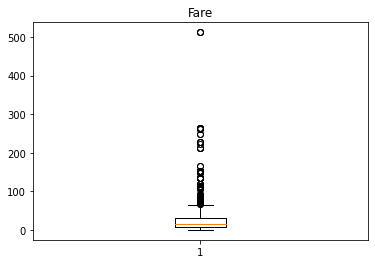

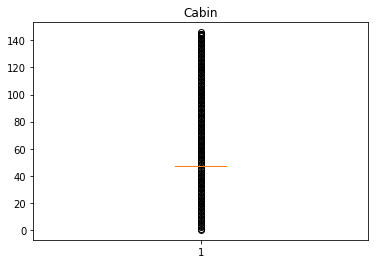

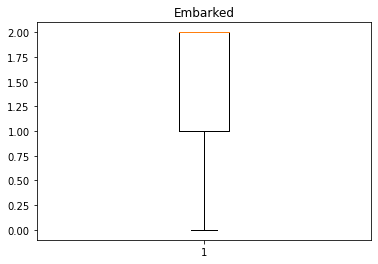

In [220]:
#checking for outliners
#ploting boxplot to see outliners
for i in [ 'Survived', 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked' ]:
       plt.figure()
       plt.boxplot(data[i])
       plt.title(i)

In [221]:
#outliner handling
#finding Q1,Q2,Q3
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print("Q1:",Q1)
print("Q2:",Q2)
print("Q3:",Q3)
print("Median:",data['Age'].median())
#finding IQR
IQR=stats.iqr(data.Age,interpolation="midpoint")
print("IQR:",IQR)
#finding min and max limit
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
print("min_limit:",min_limit,"max_limit:",max_limit)

Q1: 22.0
Q2: 28.0
Q3: 35.0
Median: 28.0
IQR: 13.0
min_limit: 2.5 max_limit: 54.5


<ipython-input-221-e0d1c4e052e3>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['Age'],25,interpolation='midpoint')
<ipython-input-221-e0d1c4e052e3>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['Age'],50,interpolation='midpoint')
<ipython-input-221-e0d1c4e052e3>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(data['

In [222]:
#finding points greater than max limit as outliners
data.loc[data.Age>max_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,1,1,0,58.0,0,0,38,26.5500,49,2
15,1,2,0,55.0,0,0,153,16.0000,47,2
33,0,2,1,66.0,0,0,549,10.5000,47,2
54,0,1,1,65.0,0,1,29,61.9792,23,0
94,0,3,1,59.0,0,0,428,7.2500,47,2
96,0,1,1,71.0,0,0,607,34.6542,12,0
116,0,3,1,70.5,0,0,460,7.7500,47,1
152,0,3,1,55.5,0,0,516,8.0500,47,2
170,0,1,1,61.0,0,0,5,33.5000,18,2
174,0,1,1,56.0,0,0,90,30.6958,14,0


In [223]:
#finding points less than min limit as outliners
data.loc[data.Age<min_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,0,3,1,2.00,3,1,395,21.0750,47,2
16,0,3,1,2.00,4,1,480,29.1250,47,1
78,1,2,1,0.83,0,2,158,29.0000,47,2
119,0,3,0,2.00,4,2,333,31.2750,47,2
164,0,3,1,1.00,4,1,249,39.6875,47,2
172,1,3,0,1.00,1,1,344,11.1333,47,2
183,1,2,1,1.00,2,1,114,39.0000,144,2
205,0,3,0,2.00,0,1,316,10.4625,145,2
297,0,1,0,2.00,1,2,37,151.5500,62,2
305,1,1,1,0.92,1,2,37,151.5500,62,2


In [224]:
#replacing the outliners by median
data.loc[data['Age']>max_limit,'Age']=np.median(data.Age)
data.loc[data['Age']<min_limit,'Age']=np.median(data.Age)

In [225]:
data.loc[data.Age>max_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [226]:
data.loc[data.Age<min_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [227]:
#finding Q1,Q2,Q3
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
print("Q1:",Q1)
print("Q2:",Q2)
print("Q3:",Q3)
print("Median:",data['SibSp'].median())
#finding IQR
IQR=stats.iqr(data.SibSp,interpolation="midpoint")
print("IQR:",IQR)
#finding min and max limit
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
print("min_limit:",min_limit,"max_limit:",max_limit)

Q1: 0.0
Q2: 0.0
Q3: 1.0
Median: 0.0
IQR: 1.0
min_limit: -1.5 max_limit: 2.5


<ipython-input-227-ec8c04270730>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
<ipython-input-227-ec8c04270730>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
<ipython-input-227-ec8c04270730>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(da

In [228]:
#finding points greater than max limit as outliners
data.loc[data.SibSp>max_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,0,3,1,28.0,3,1,395,21.0750,47,2
16,0,3,1,28.0,4,1,480,29.1250,47,1
24,0,3,0,8.0,3,1,395,21.0750,47,2
27,0,1,1,19.0,3,2,95,263.0000,63,2
50,0,3,1,7.0,4,1,249,39.6875,47,2
59,0,3,1,11.0,5,2,566,46.9000,47,2
63,0,3,1,4.0,3,2,337,27.9000,47,2
68,1,3,0,17.0,4,2,248,7.9250,47,2
71,0,3,0,16.0,5,2,566,46.9000,47,2
85,1,3,0,33.0,3,0,247,15.8500,47,2


In [229]:
#finding points less than min limit as outliners
data.loc[data.SibSp<min_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [230]:
#replacing the outliners by median
data.loc[data['SibSp']>max_limit,'SibSp']=np.median(data.SibSp)


In [231]:
data.loc[data.SibSp>max_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [232]:
data.loc[data.Age<min_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [233]:
#finding Q1,Q2,Q3
Q1=np.percentile(data['Parch'],25,interpolation='midpoint')
Q2=np.percentile(data['Parch'],50,interpolation='midpoint')
Q3=np.percentile(data['Parch'],75,interpolation='midpoint')
print("Q1:",Q1)
print("Q2:",Q2)
print("Q3:",Q3)
print("Median:",data['Parch'].median())
#finding IQR
IQR=stats.iqr(data.Parch,interpolation="midpoint")
print("IQR:",IQR)
#finding min and max limit
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
print("min_limit:",min_limit,"max_limit:",max_limit)

Q1: 0.0
Q2: 0.0
Q3: 0.0
Median: 0.0
IQR: 0.0
min_limit: 0.0 max_limit: 0.0


<ipython-input-233-2830ea41268e>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['Parch'],25,interpolation='midpoint')
<ipython-input-233-2830ea41268e>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['Parch'],50,interpolation='midpoint')
<ipython-input-233-2830ea41268e>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(da

In [234]:
data.loc[data.Parch>max_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,0,3,1,28.0,0,1,395,21.0750,47,2
8,1,3,0,27.0,0,2,344,11.1333,47,2
10,1,3,0,4.0,1,1,616,16.7000,145,2
13,0,3,1,39.0,1,5,333,31.2750,47,2
16,0,3,1,28.0,0,1,480,29.1250,47,1
...,...,...,...,...,...,...,...,...,...,...
871,1,1,0,47.0,1,1,54,52.5542,102,2
879,1,1,0,28.0,0,1,59,83.1583,70,0
880,1,2,0,25.0,0,1,115,26.0000,47,2
885,0,3,0,39.0,0,5,480,29.1250,47,1


In [235]:
data.loc[data.Parch<min_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [236]:
data.loc[data['Parch']>max_limit,'Parch']=np.median(data.Parch)

In [237]:
data.loc[data.Parch>max_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [238]:
#finding Q1,Q2,Q3
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print("Q1:",Q1)
print("Q2:",Q2)
print("Q3:",Q3)
print("Median:",data['Fare'].median())
#finding IQR
IQR=stats.iqr(data.Fare,interpolation="midpoint")
print("IQR:",IQR)
#finding min and max limit
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
print("min_limit:",min_limit,"max_limit:",max_limit)

Q1: 7.9104
Q2: 14.4542
Q3: 31.0
Median: 14.4542
IQR: 23.0896
min_limit: -26.724 max_limit: 65.6344


<ipython-input-238-bfadc76bbe11>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
<ipython-input-238-bfadc76bbe11>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
<ipython-input-238-bfadc76bbe11>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(data

In [239]:
data.loc[data.Fare>max_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,0,38.0,1,0,596,71.2833,81,0
27,0,1,1,19.0,0,0,95,263.0000,63,2
31,1,1,0,28.0,1,0,586,146.5208,41,0
34,0,1,1,28.0,1,0,600,82.1708,47,0
52,1,1,0,49.0,1,0,587,76.7292,101,0
...,...,...,...,...,...,...,...,...,...,...
846,0,3,1,28.0,0,0,568,69.5500,47,2
849,1,1,0,28.0,1,0,84,89.1042,86,0
856,1,1,0,45.0,1,0,453,164.8667,47,2
863,0,3,0,28.0,0,0,568,69.5500,47,2


In [240]:
data.loc[data.Fare<min_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [241]:
data.loc[data['Fare']>max_limit,'Fare']=np.median(data.Fare)

In [242]:
data.loc[data.Fare>max_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [243]:
#finding Q1,Q2,Q3
Q1=np.percentile(data['Cabin'],25,interpolation='midpoint')
Q2=np.percentile(data['Cabin'],50,interpolation='midpoint')
Q3=np.percentile(data['Cabin'],75,interpolation='midpoint')
print("Q1:",Q1)
print("Q2:",Q2)
print("Q3:",Q3)
print("Median:",data['Cabin'].median())
#finding IQR
IQR=stats.iqr(data.Cabin,interpolation="midpoint")
print("IQR:",IQR)
#finding min and max limit
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
print("min_limit:",min_limit,"max_limit:",max_limit)

Q1: 47.0
Q2: 47.0
Q3: 47.0
Median: 47.0
IQR: 0.0
min_limit: 47.0 max_limit: 47.0


<ipython-input-243-28c7199b47de>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['Cabin'],25,interpolation='midpoint')
<ipython-input-243-28c7199b47de>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['Cabin'],50,interpolation='midpoint')
<ipython-input-243-28c7199b47de>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(da

In [244]:
data.loc[data.Cabin>max_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,0,38.0,1,0,596,14.4542,81,0
3,1,1,0,35.0,1,0,49,53.1000,55,2
6,0,1,1,54.0,0,0,85,51.8625,129,2
10,1,3,0,4.0,1,0,616,16.7000,145,2
11,1,1,0,28.0,0,0,38,26.5500,49,2
...,...,...,...,...,...,...,...,...,...,...
857,1,1,1,51.0,0,0,23,26.5500,119,2
862,1,1,0,48.0,0,0,88,25.9292,94,2
871,1,1,0,47.0,1,0,54,52.5542,102,2
879,1,1,0,28.0,0,0,59,14.4542,70,0


In [245]:
data.loc[data.Cabin<min_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
23,1,1,1,28.0,0,0,42,35.5000,13,2
31,1,1,0,28.0,1,0,586,14.4542,41,0
54,0,1,1,28.0,0,0,29,61.9792,23,0
61,1,1,0,38.0,0,0,32,14.4542,21,2
96,0,1,1,28.0,0,0,607,34.6542,12,0
118,0,1,1,24.0,0,0,585,14.4542,36,0
139,0,1,1,24.0,0,0,592,14.4542,45,0
170,0,1,1,28.0,0,0,5,33.5000,18,2
174,0,1,1,28.0,0,0,90,30.6958,14,0
185,0,1,1,28.0,0,0,34,50.0000,9,2


In [246]:
data.loc[data['Cabin']>max_limit,'Cabin']=np.median(data.Cabin)
data.loc[data['Cabin']<min_limit,'Cabin']=np.median(data.Cabin)

In [247]:
data.loc[data.Cabin>max_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [248]:
data.loc[data.Cabin<min_limit]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


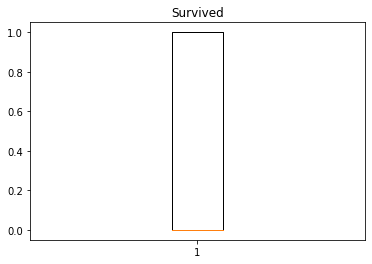

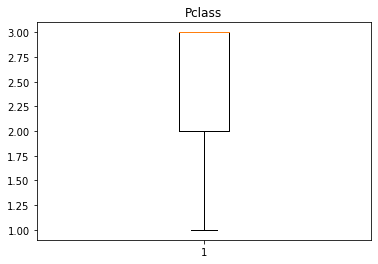

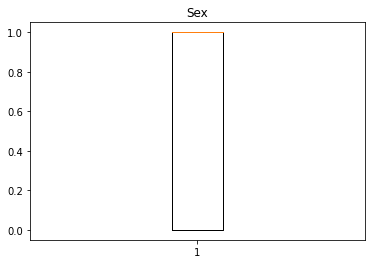

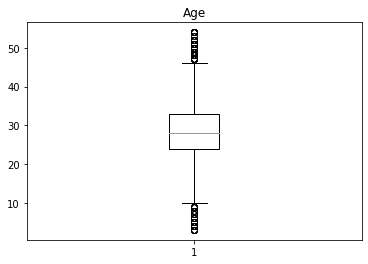

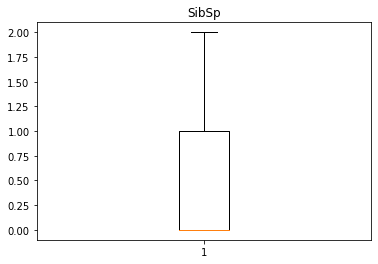

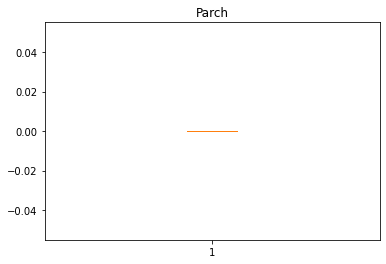

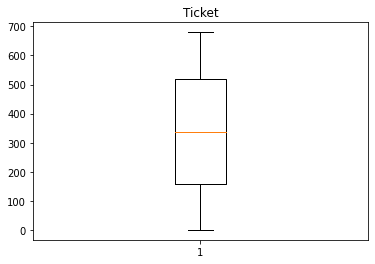

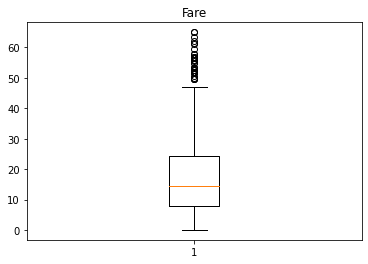

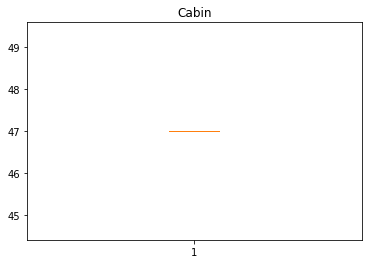

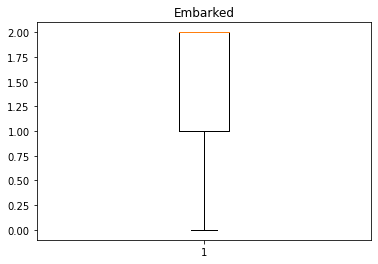

In [249]:
#ploting boxplot to see outliners
for i in [ 'Survived', 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked' ]:
       plt.figure()
       plt.boxplot(data[i])
       plt.title(i)

In [132]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,28.0,1,0,523,7.2500,47,2
1,1,1,0,28.0,1,0,596,14.4542,47,0
2,1,3,0,28.0,0,0,669,7.9250,47,2
3,1,1,0,28.0,1,0,49,14.4542,47,2
4,0,3,1,28.0,0,0,472,8.0500,47,2


KNN

In [134]:
y=data['Survived']
x=data.drop(['Survived'],axis=1)

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)


In [142]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,recall_score,f1_score
metric_k=[]#creating empty list for putting accuracy values of different k values
neighbors=np.arange(2,15)#creating array with values 3 to 15

for k in neighbors:#3 to 15 taaken by k
       classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)#instance called classifier
       model=classifier.fit(x_train,y_train)#model created
       y_pred=model.predict(x_test)
       acc =accuracy_score(y_test,y_pred)
       metric_k.append(acc)

In [143]:
metric_k#maximun value in this ,that k value taken

[0.7150837988826816,
 0.7541899441340782,
 0.7374301675977654,
 0.7430167597765364,
 0.6983240223463687,
 0.6927374301675978,
 0.7039106145251397,
 0.6871508379888268,
 0.6927374301675978,
 0.7039106145251397,
 0.6871508379888268,
 0.6983240223463687,
 0.6815642458100558]

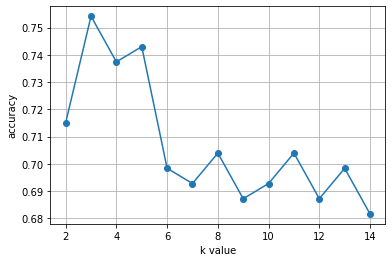

In [144]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()
#k=3 has max acc value

In [145]:
classifier=KNeighborsClassifier(3,metric='minkowski',p=2)#instance called classifier
model=classifier.fit(x_train,y_train)#model created
y_pred=model.predict(x_test)
print('Accuracy=',accuracy_score(y_test,y_pred))
print('Precision=',precision_score(y_test,y_pred))
print('Recall=',recall_score(y_test,y_pred))
print('F1=',f1_score(y_test,y_pred))

Accuracy= 0.7541899441340782
Precision= 0.7419354838709677
Recall= 0.6216216216216216
F1= 0.676470588235294


In [146]:
confusion_matrix(y_test,y_pred)

array([[89, 16],
       [28, 46]])

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


In [148]:
classifier=KNeighborsClassifier(3,metric='minkowski',p=2)#instance called classifier
model=classifier.fit(x_train,y_train)#model created
y_pred=model.predict(x_test)
print('Accuracy=',accuracy_score(y_test,y_pred))
print('Precision=',precision_score(y_test,y_pred))
print('Recall=',recall_score(y_test,y_pred))
print('F1=',f1_score(y_test,y_pred))

Accuracy= 0.8156424581005587
Precision= 0.8059701492537313
Recall= 0.7297297297297297
F1= 0.7659574468085106


SVM

In [171]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [172]:
y_pred_svm=svmclf.predict(x_test)

In [173]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred_svm))

0.7821229050279329


In [153]:
print(confusion_matrix(y_test,y_pred_svm))

[[88 17]
 [22 52]]


In [174]:
from sklearn.svm import SVC
svmclf1=SVC(kernel='rbf')
svmclf1.fit(x_train,y_train)

SVC()

In [175]:
y_pred_svm1=svmclf1.predict(x_test)

In [176]:
print(accuracy_score(y_test,y_pred_svm1))

0.6871508379888268


In [177]:
from sklearn.svm import SVC
svmclf2=SVC(kernel='poly')
svmclf2.fit(x_train,y_train)

SVC(kernel='poly')

In [178]:
y_pred_svm2=svmclf2.predict(x_test)

In [179]:
print(accuracy_score(y_test,y_pred_svm2))

0.5865921787709497


K-Fold cross validation on knn

In [ ]:
#on knn model

In [160]:
from sklearn.model_selection import KFold

In [161]:
kfold_validator=KFold(10)

In [ ]:
for train_index,test_index in kfold_validator.split(x,y):
    print('train_index;',train_index)
    print('test_index;',test_index)

In [162]:
from sklearn.model_selection import cross_val_score

In [164]:
cv_score=cross_val_score(model,x,y,cv=kfold_validator)
cv_score

array([0.68888889, 0.62921348, 0.66292135, 0.68539326, 0.70786517,
       0.73033708, 0.74157303, 0.73033708, 0.7752809 , 0.73033708])

In [165]:
np.mean(cv_score)

0.7082147315855181

Stratified Cross validation on knn

In [ ]:
#on knn model

In [166]:
from sklearn.model_selection import StratifiedKFold

In [167]:
skfold_validator=StratifiedKFold(n_splits=10)

In [ ]:
for train_index,test_index in skfold_validator.split(x,y):
    print('train_index;',train_index)
    print('test_index;',test_index)

In [168]:
skcv_score=cross_val_score(model,x,y,cv=skfold_validator)

In [169]:
skcv_score

array([0.7       , 0.61797753, 0.59550562, 0.70786517, 0.74157303,
       0.73033708, 0.76404494, 0.75280899, 0.76404494, 0.71910112])

In [170]:
np.mean(skcv_score)

0.7093258426966292

K-Fold cross validation on svm

In [ ]:
#on svm-linear

In [180]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [181]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(svmclf,x,y,cv=kfold_validator)

In [182]:
cv_score

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [183]:
np.mean(cv_score)

0.786729088639201

In [184]:
#on svm-rbf
cv_score=cross_val_score(svmclf1,x,y,cv=kfold_validator)

In [185]:
print(cv_score)
np.mean(cv_score)

[0.6        0.70786517 0.60674157 0.58426966 0.65168539 0.66292135
 0.6741573  0.69662921 0.66292135 0.71910112]


0.6566292134831461

In [186]:
#on svm-poly
cv_score=cross_val_score(svmclf2,x,y,cv=kfold_validator)

In [187]:
print(cv_score)
np.mean(cv_score)

[0.56666667 0.7752809  0.61797753 0.49438202 0.58426966 0.64044944
 0.56179775 0.62921348 0.66292135 0.62921348]


0.6162172284644194

Stratified cross validation on svm

In [204]:
#linear
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)

In [190]:
skcv_score=cross_val_score(svmclf,x,y,cv=skfold_validator)

In [191]:
skcv_score

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [192]:
np.mean(skcv_score)

0.786729088639201

In [205]:
#rbf
skcv_score=cross_val_score(svmclf1,x,y,cv=skfold_validator)

In [206]:
skcv_score

array([0.62222222, 0.66292135, 0.58426966, 0.62921348, 0.68539326,
       0.65168539, 0.68539326, 0.70786517, 0.62921348, 0.71910112])

In [207]:
np.mean(skcv_score)

0.6577278401997503

In [201]:
#poly
skcv_score=cross_val_score(svmclf2,x,y,cv=skfold_validator)


In [202]:
skcv_score

array([0.61111111, 0.61797753, 0.61797753, 0.61797753, 0.61797753,
       0.61797753, 0.61797753, 0.61797753, 0.61797753, 0.60674157])

In [203]:
np.mean(skcv_score)

0.616167290886392

In [ ]:
#K-Fold cross validation         
#knn=0.7082147315855181                            
#svm-linear=0.786729088639201                    
#svm-rbf=0.6566292134831461                       
#svm-poly=0.6162172284644194                       


In [ ]:
#stratified cross validation
#knn=0.7093258426966292
#svm-linear=0.786729088639201
#svm-rbf=0.6577278401997503
#svm-poly=0.616167290886392